# Project Foundations for Data Science: FoodHub Data Analysis

# ***SUBMITTED BY: FANI TZINA***

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
# FANI TZINA'S ANSWER:
rows, cols = df.shape

print("The number of rows that are present in the data is: ", rows)
print("The number of columns that are present in the data is: ", cols)

The number of rows that are present in the data is:  1898
The number of columns that are present in the data is:  9


#### Observations:
As printed above, our dataset has 1898 rows and 9 columns.
There are 2 ways to answer to Question 1: (a) I could compile "df" in the code section, so my whole dataset ould be printed in an array. At the end of this array, the shape of our dataset is mentioned and, (b) I decided to use the .shape function in order to get right away the number of rows and columns of our dataset -without having to parse again our dataset as it happens in (a)-.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# FANI TZINA'S ANSWER:
# Use info() to print a concise summary of the DataFrame
df.info() # solution (a)

# df.dtypes # solution (b))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
As printed above, our dataset has 3 datatypes in our dataset: float64, int64 and object.
There are 2 ways to answer to Question 2: (a) I could use the "df.info()" function, so that I take a small look at my dataset and, (b) I could use the "df.dtype()" function, so that I isolate the last column of "df.info()" and so  get right away the datatypes of my dataset.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
# FANI TZINA'S ANSWER:
df.isnull().sum()

# Alternatively:
# df.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There are no missing values in our dataset and that is something we can tell by 2 techniques: (a) the "df.info()" function, that I used above, gives me a concise summary about my dataset and actually informs about the names of the columns, the datatypes and the missing values. I could tell if there were missing values by comparing the number of rows -that we calculated on Question 1 and is equal to 1898- with the "Non-Null Count" column that is printed when I compile the "df.info()" function. Here, we can see that these printed values are equal to the number of rows, and so our dataset has no missing values.
(b) I can check my former assumption by using 2 functions: "df.isnull().sum()" or "df.isna().sum()" and have printed all the missing values from each column of our dataset. As we can see right above, there are indeed no missing values.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# FANI TZINA'S ANSWER:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:


In [ ]:
# FANI TZINA'S ANSWER:
print("The MINIMUM time it takes for food to be prepared, once an order is placed, is: ", df["food_preparation_time"].min(), " minutes.")
print("The AVERAGE time it takes for food to be prepared, once an order is placed, is: ", round(df["food_preparation_time"].mean(),2), " minutes.")
print("The MAXIMUM time it takes for food to be prepared, once an order is placed, is: ", df["food_preparation_time"].max(), " minutes.")

The MINIMUM time it takes for food to be prepared, once an order is placed, is:  20  minutes.
The AVERAGE time it takes for food to be prepared, once an order is placed, is:  27.37  minutes.
The MAXIMUM time it takes for food to be prepared, once an order is placed, is:  35  minutes.


### **Question 5:** How many orders are not rated?

In [ ]:
# FANI TZINA'S ANSWER:
not_given_ans = (df["rating"] == "Not given").sum()
print(not_given_ans, " orders are not rated.")

736  orders are not rated.


#### Observations:
In order to solve this question I considered 2 steps:
1. I need to see this specific "rating" column of my dataset, so one solution would be to compile "df["rating"]". But that does not give me much information since I only isolate this column from the data.
2. Next step is to look specifically for the "Not Given" values in the "rating" column. But again I take back an array which does not really reply to the question.
3. So, after I set the condition "df["rating"] == "Not given" " to find the not-rated orders, I added the .sum() function in order to calculate the total number of not-rated orders of our dataset.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

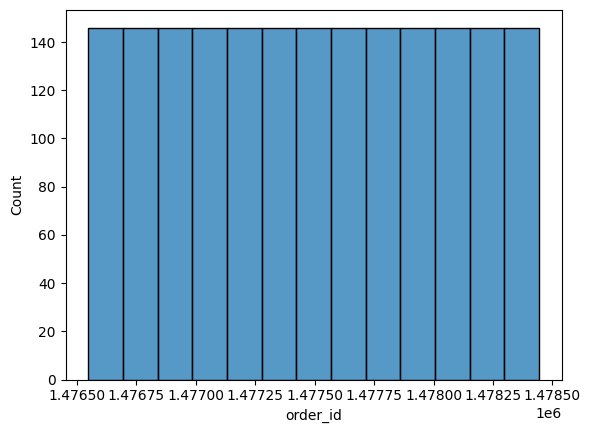

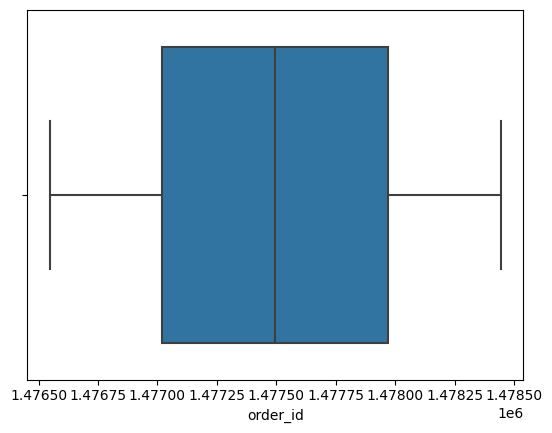

In [ ]:
# FANI TZINA'S answer
## order ID
sns.histplot(data=df, x="order_id")
plt.show()

sns.boxplot(data=df, x="order_id")
plt.show()

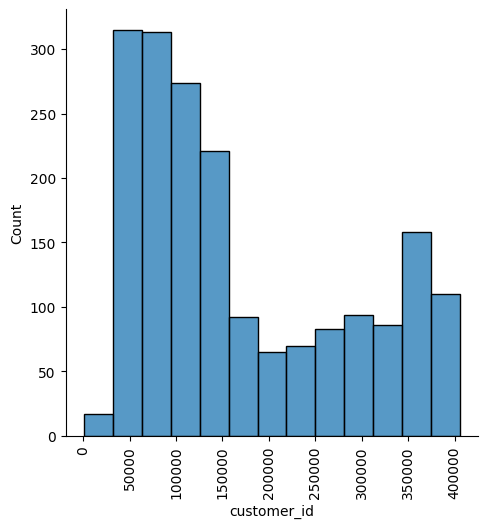

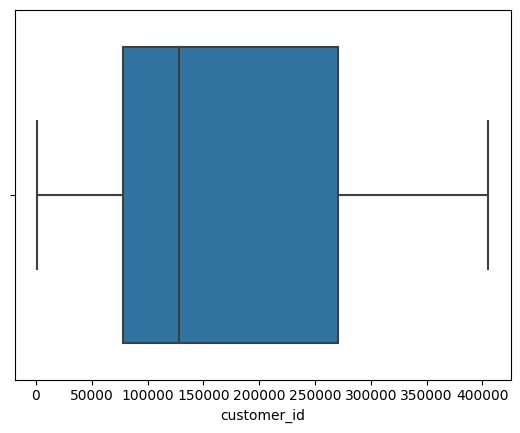

In [ ]:
## customer_id
sns.displot(data=df, x="customer_id")
plt.xticks(rotation=90)
plt.show()

sns.boxplot(data=df, x="customer_id")
plt.show()

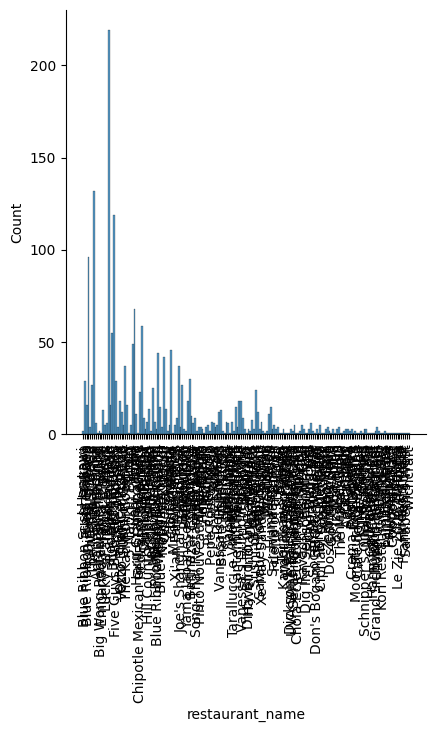

In [ ]:
## restaurant_name,
sns.displot(data=df, x="restaurant_name")
plt.xticks(rotation=90)
plt.show()

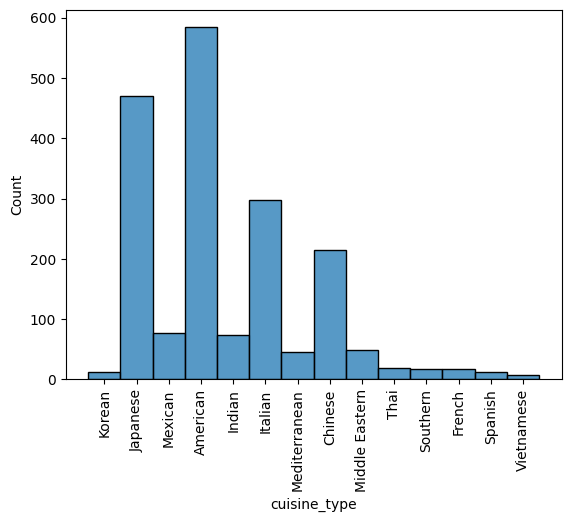

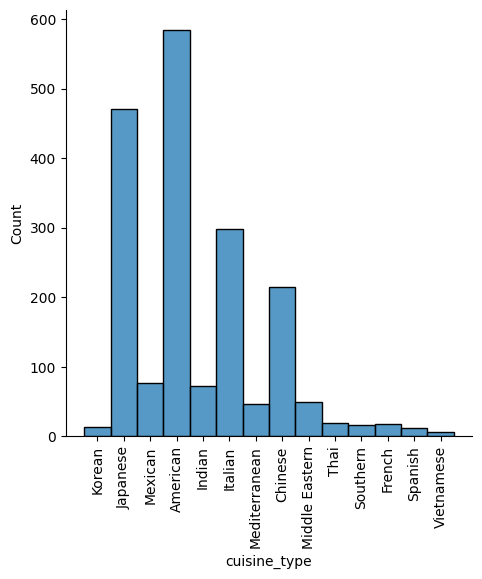

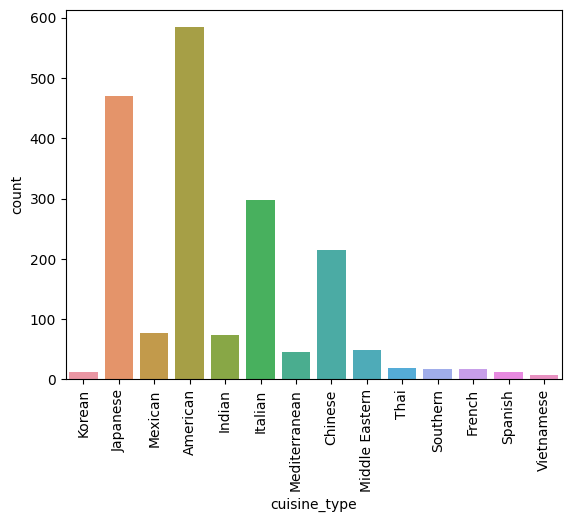

In [ ]:
## cuisine_type,
sns.histplot(data=df, x="cuisine_type")
plt.xticks(rotation=90)
plt.show()
# or
sns.displot(data=df, x="cuisine_type")
plt.xticks(rotation=90)
plt.show()

sns.countplot(data=df, x="cuisine_type")
plt.xticks(rotation=90)
plt.show()

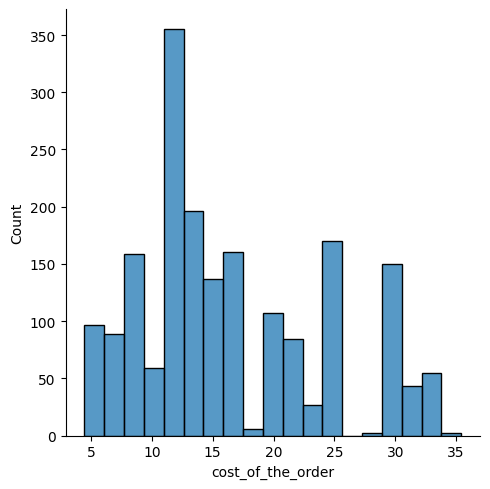

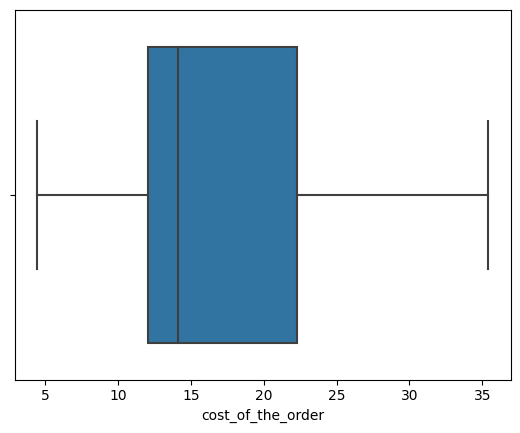

In [ ]:
## cost of order
sns.displot(data=df, x="cost_of_the_order")
plt.show()

sns.boxplot(data=df, x="cost_of_the_order")
plt.show()

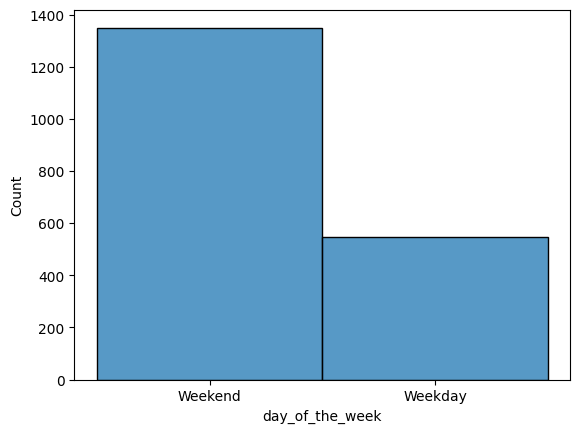

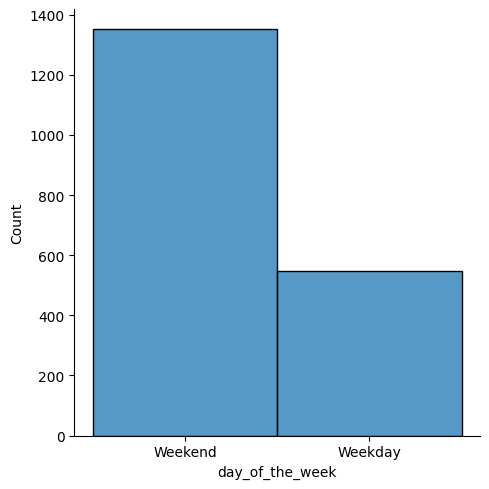

In [ ]:
## day_of_the_week
sns.displot(data=df, x="day_of_the_week")
plt.show()

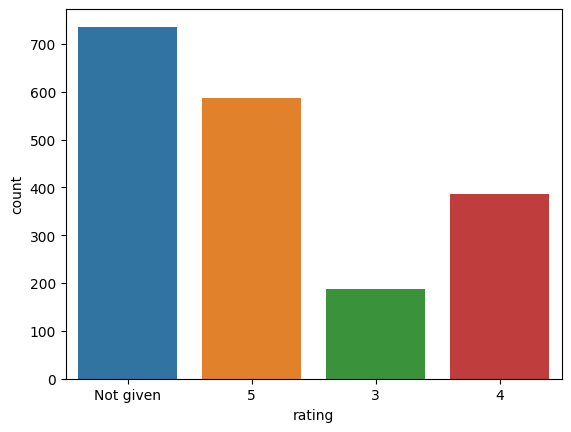

In [ ]:
## rating
sns.countplot(data=df, x="rating")
plt.show()

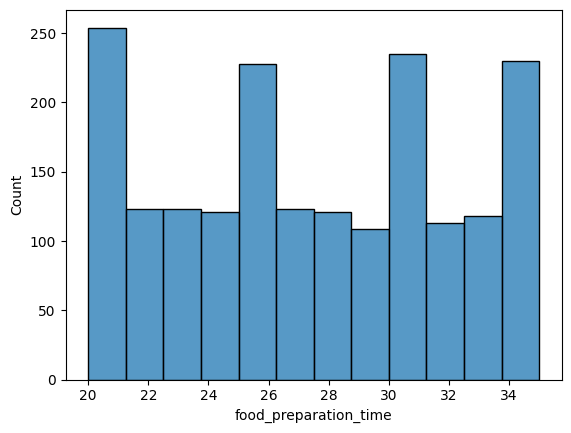

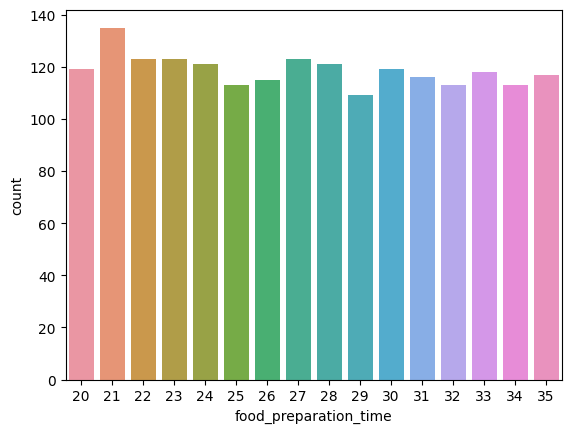

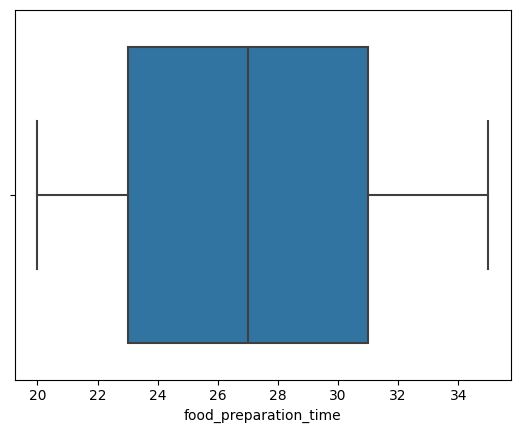

In [ ]:
## food_preparation_time
sns.histplot(data=df, x="food_preparation_time")
plt.show()

sns.countplot(data=df, x="food_preparation_time")
plt.show()

sns.boxplot(data=df, x="food_preparation_time")
plt.show()

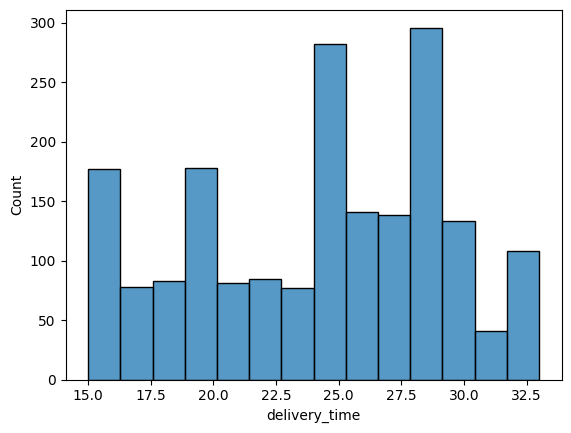

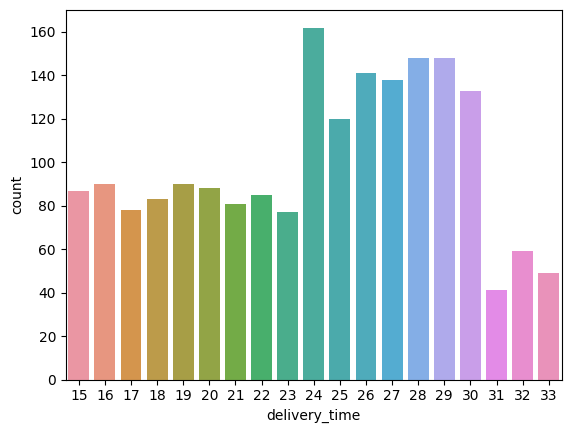

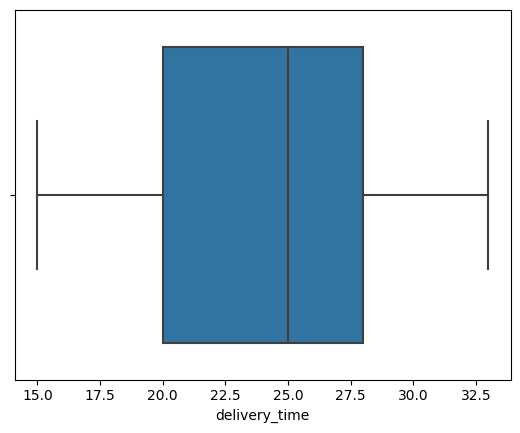

In [ ]:
## delivery_time
sns.histplot(data=df, x="delivery_time")
plt.show()

sns.countplot(data=df, x="delivery_time")
plt.show()

sns.boxplot(data=df, x="delivery_time")
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# FANI TZINA'S ANSWER:
print("The top 5 restaurants in terms of the number of orders received are: \n",
  df[['restaurant_name', 'order_id']].sort_values(by= "order_id", ascending=False).head(5)
)

The top 5 restaurants in terms of the number of orders received are: 
                   restaurant_name  order_id
1806                  Shake Shack   1478444
887                  Cafe Mogador   1478443
1668  Five Guys Burgers and Fries   1478442
755                RedFarm Hudson   1478441
287                        Momoya   1478440


#### Observations:
In order to answer this question, first of all I have to combine the values from the 'restaurant_name' and 'order_id' columns and then, sort them in descending order based on the 'order_id' values. As a result, I get an array with the top restaurants and above, the top 5 of them are printed in an array.

### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
# Fani Tzina's answer:
print("The most popular cuisine on weekends is: ", df[["day_of_the_week", "cuisine_type"][1]].max())

The most popular cuisine on weekends is:  Vietnamese


#### Observations:
The most popular cuisine on weekends is:  Vietnamese.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# FANI TZINA's ANSWER:
counts = (df["cost_of_the_order"] > 20).sum()
ans = (counts/len(df)) *100
print("The percentage of the orders cost more than 20 dollars is: ", round(ans,2), "%.")

The percentage of the orders cost more than 20 dollars is:  29.24 %.


#### Observations:
Here, I had to find in the 'cost_of_the_order' columns the orders that cost more than 20 dollars and add them all together in a variable, that I called 'counts'. Eventually, the percentage of the orders cost more than 20 dollars is:  29.24 %.

### **Question 10**: What is the mean order delivery time?

In [ ]:
# FANI TZINA's ANSWER:
print("The mean order delivery time is:", round(df["delivery_time"].mean(),2), " minutes.")

The mean order delivery time is: 24.16  minutes.


#### Observations:
The mean order delivery time is: 24.16  minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
# FANI TZINA's ANSWER:
df[['customer_id', 'order_id']].sort_values(by= "order_id", ascending= False).head(3)

,customer_id,order_id
1806,355090,1478444
887,96943,1478443
1668,378035,1478442


#### Observations:
In order to answer this question, I thought that first of all I have to combine the values from the 'customer_id' and 'order_id' columns and then, sort them in descending order based on the 'order_id' values. As a result, I get an array with the most frequent costumers and above, the top 3 of them are printed in an array.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

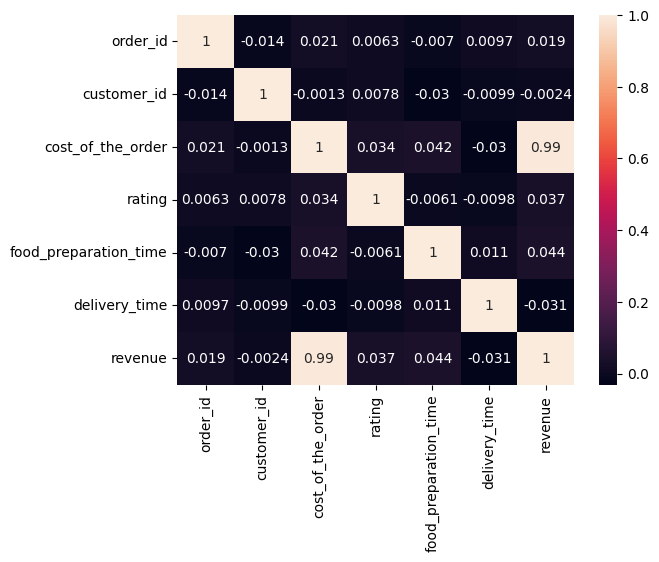

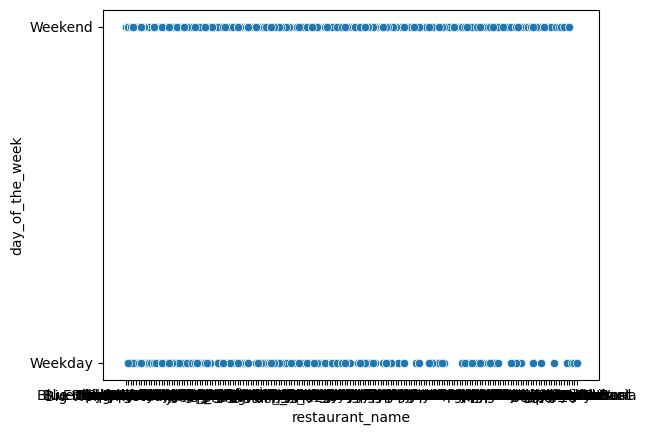

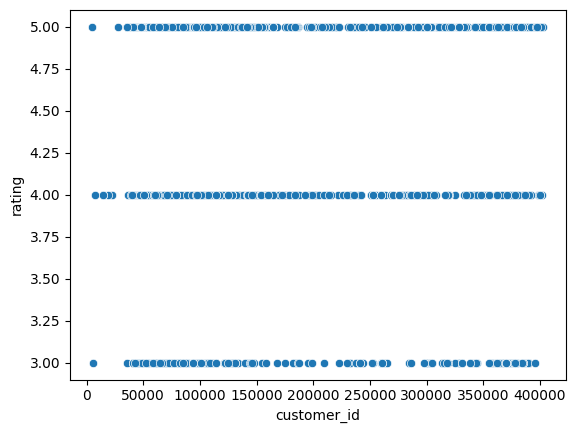

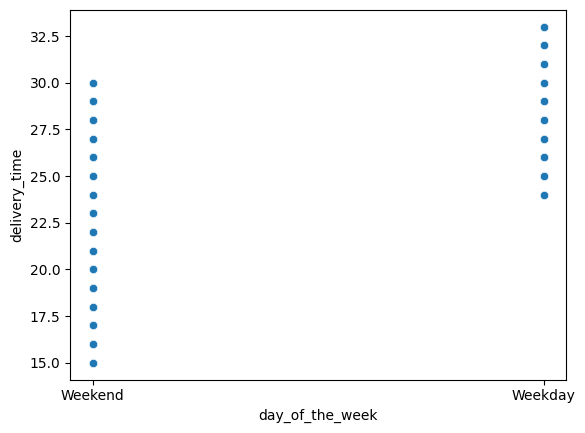

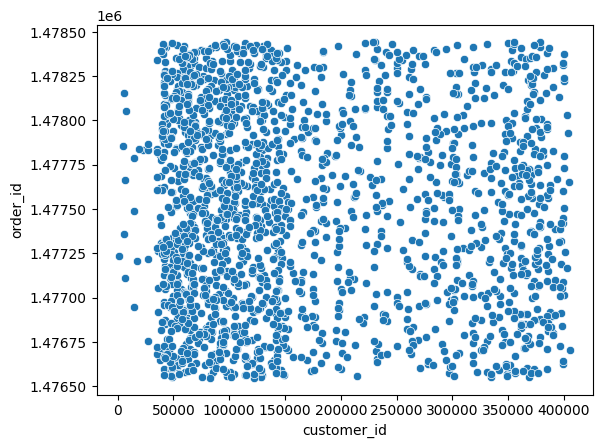

In [ ]:
# DATASET'S COLUMNS:
#["order_id",	"customer_id",	"restaurant_name",	"cuisine_type",	"cost_of_the_order",	"day_of_the_week",	"rating",	"food_preparation_time",	"delivery_time"]

sns.heatmap(data = df.corr(), annot = True)
plt.show()
sns.scatterplot(data=df, x="restaurant_name", y="day_of_the_week")
plt.show()
sns.scatterplot(data=df, x="customer_id", y="rating")
plt.show()
sns.scatterplot(data=df, x="day_of_the_week", y="delivery_time")
plt.show()
sns.scatterplot(data=df, x="customer_id", y="order_id")
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
# FANI TZINA's ANSWER:
# Find the NaN / Not given values in the "rating" column:
df["rating"] = df["rating"].replace("Not given", np.nan).astype(float)
df.loc[df["rating"].isnull() == True]
nan_mask = np.isnan(df["rating"])

# Filter the array to remove NaN values
filtered_data = df[~nan_mask]
filtered_data["rating"].mean()

df[df['rating']>filtered_data["rating"].mean()][['restaurant_name', 'rating']].value_counts() > 50

restaurant_name            rating
Shake Shack                5.0        True
The Meatball Shop          5.0        True
Blue Ribbon Sushi          5.0       False
Blue Ribbon Fried Chicken  5.0       False
RedFarm Broadway           5.0       False
                                     ...  
Haru Gramercy Park         5.0       False
Galli Restaurant           5.0       False
Five Leaves                5.0       False
El Parador Cafe            5.0       False
indikitch                  5.0       False
Length: 121, dtype: bool

#### Observations:
For this question, we realise that there are some string values along with the int values in the "rating" column. And that means that I am not able to calculate the columns mean, to set the condition that is asked. So I had to turn the "Not Given" values into NaN values and then drop them so that I calculate the mean value of the column. Then, using that restriction, I printed a 2D array from my original dataset where one can see the restaurants that have a rating count bigger than 50 and an average rating greater than 4.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
# Write the code here
# Copy the data from the "cost_of_the_order" column into a new column "revenue" in my dataset:
df["revenue"] = df["cost_of_the_order"]

# If the cost_of_the_order > 20$, then apply 25% => 100-25 = 75 charge to the order:
df.loc[df["cost_of_the_order"] > 20, "revenue"] *= 0.75

# If the cost_of_the_order > 5$, then apply 15% => 100-15 = 85 charge to the order:
# CAUTION! The orders that cost more than 20$ are charged with a different %. So I have to exclude them here:
df.loc[(df["cost_of_the_order"] > 5) & (df["cost_of_the_order"] <= 20), "revenue"] *= 0.85

print("The net revenue that is generated by the company is:", df["revenue"].sum())

The net revenue that is generated by the company is: 25148.517


#### Observations:
In order to answer to this question, I had to calculate the revenue for each order by applying the appropriate charges and there is a special occasion here that should be noted: if an order costs more than 5 dollars, there is an extra charge of 15% but if the order reaches 20$, there is a different charge. So when applying the 15% charge, we should set the logic condition that keeps the 15% charge between values 5 and 20. Eventually, I sum up the revenue to find the total net revenue generated by the company across all orders which is equal to 25.148,517 dollars.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
# FANI TZINA's ANSWER:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Count orders that took more than 60 minutes
orders_over_60_minutes = df[df['total_time'] > 60]

percentage_over_60_minutes = (len(orders_over_60_minutes) / len(df)) * 100
print("The percentage of orders that take more than 60 minutes is: ", round(percentage_over_60_minutes,2), " %")

The percentage of orders that take more than 60 minutes is:  10.54  %


#### Observations:
In order to solve this question, I had to combine the data from the 2 columns (food_preparation_time and delivery_time) since we are investigating 2 seperate time periods: from the moment the store gets the order until the order is ready (preparation time) + from the moment the delivery guy gets the order and travels to the customer (delivery time). After combining these data, I had to check which time period lasts more than an hour (60 minutes) and then, calculate the percentage of this portion. The percentage is equal to 10.5%.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# FANI TZINA's ANSWER:
a1 = (df["day_of_the_week"] == "Weekend").mean()
a2 = (df["day_of_the_week"] == "Weekday").mean()

print("The mean delivery time during weekends varies per: ",round(a1*100, 2), "%.")
print("The mean delivery time during weekdays varies per: ", round(a2*100, 2), "%.")

The mean delivery time during weekdends varies per:  71.18 %.
The mean delivery time during weekdays varies per:  28.82 %.


#### Observations:
The mean delivery time during weekends is way bigger than the mean delivery time during weekdays by almost 2.5% and, I believe that this is expected due to the fact that the data show a huge amount of orders during weekends in comparison to the weekdays.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  

### Recommendations:

*  

---